<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/IBMEC6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**kNN**

In [1]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv')
dados

,SEXO,ALTURA,PESO
0,0,187.571423,109.951620
1,0,174.706036,73.777488
2,0,188.239668,96.700389
3,0,182.196685,100.019305
4,0,177.499762,93.795364
...,...,...,...
9995,1,168.078537,62.171570
9996,1,170.350573,77.667230
9997,1,162.224700,58.397872
9998,1,175.346978,74.478392


In [2]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(dados[['ALTURA','PESO']],dados['SEXO'] ,test_size=0.2)
X_treino.head(2)

,ALTURA,PESO
5328,165.699219,58.384734
4659,175.477916,88.474172


In [3]:
y_treino.head(2)

5328    1
4659    0
Name: SEXO, dtype: int64

In [4]:
from sklearn.neighbors import KNeighborsClassifier
kviz = KNeighborsClassifier(n_neighbors=3)
kviz.fit(X_treino , y_treino)
acuracia_treino = kviz.score(X_treino , y_treino)
acuracia_treino*100

94.0375

In [5]:
prev_treino = kviz.predict(X_treino)
acuracia_treino = sum(prev_treino == y_treino) / len(X_treino) *100
acuracia_treino

94.0375

In [6]:
X_teste.head(4)

,ALTURA,PESO
9546,166.533027,74.801942
7183,168.580343,67.944979
3063,177.503965,82.579427
3645,169.997797,74.650089


In [7]:
y_teste.head(4)

9546    1
7183    1
3063    0
3645    0
Name: SEXO, dtype: int64

In [8]:
prev_teste=kviz.predict(X_teste)
prev_teste

array([1, 1, 0, ..., 0, 1, 1])

In [9]:
acuracia_teste = sum(prev_teste == y_teste) / len(prev_teste) *100
acuracia_teste

89.8

In [10]:
matriz_confusao = pd.crosstab(y_teste , prev_teste)
matriz_confusao

col_0,0,1
SEXO,,
0,893,113
1,91,903


In [11]:
tn = matriz_confusao[0][0]
tp = matriz_confusao[1][1]
fp = matriz_confusao[1][0]
fn = matriz_confusao[0][1]
print('tn',tn)
print('tp',tp)
print('fn',fn)
print('fp',fp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print('precision',precision*100)
print('recall',recall*100)

tn 893
tp 903
fn 91
fp 113
precision 88.87795275590551
recall 90.84507042253522


[[893 113]
 [ 91 903]]


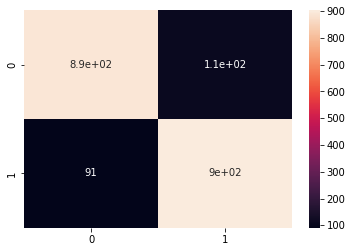

In [12]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste , prev_teste)
print(cm)
sns.heatmap(cm, annot=True)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_teste , prev_teste))


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1006
           1       0.89      0.91      0.90       994

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



**Exercicio kNN**

In [14]:
from sklearn.neighbors import KNeighborsClassifier

treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
treino

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9
...,...,...,...,...,...
95,1,1,4,1,2.9
96,1,1,4,1,1.4
97,0,2,7,8,2.6
98,0,1,7,8,5.8


In [15]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20prever2.csv')
teste


,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.40
1,0,2,7,9,2.60
2,0,1,7,9,5.80
3,0,1,7,9,4.70
4,0,1,7,9,3.90
5,0,1,8,9,3.25
6,0,1,8,8,7.20
7,1,2,4,3,1.25


In [16]:
kviz = KNeighborsClassifier(n_neighbors=5)
kviz.fit(treino[['Genero',	'GrauEscolaridade',	'Profissao'	,'Renda']] , treino['Inadimplente'])

previsoes = kviz.predict(teste[['Genero',	'GrauEscolaridade',	'Profissao'	,'Renda']])
previsoes


array([1, 0, 0, 0, 0, 0, 0, 1])

In [17]:
matriz = pd.crosstab(teste['Inadimplente'] , previsoes)
matriz

col_0,0,1
Inadimplente,,
0,6,0
1,0,2


# Base de dados iris
## Informações
http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html
ou
http://archive.ics.uci.edu/ml/datasets/Iris

In [18]:
import pandas as pd
import numpy as np
import math
import operator

In [19]:
col=['sepal_length','sepal_width','petal_length','petal_width','type']
#iris=pd.read_csv("https://raw.githubusercontent.com/saireddyavs/machine-learning/master/iris.xlsx",names=col)
iris=pd.read_csv("https://raw.githubusercontent.com/lcbjrrr/lcbjrrr/master/iris%20-%20ok.csv",names=col)

In [20]:
print("First five rows")
print(iris.head())
print("*********")
print("columns",iris.columns)
print("*********")
print("shape:",iris.shape)
print("*********")
print("Size:",iris.size)
print("*********")
print("no of samples available for each type")
print(iris['type'].value_counts())
print("*********")
print(iris.describe())

First five rows
   sepal_length  sepal_width  petal_length  petal_width         type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
*********
columns Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')
*********
shape: (150, 5)
*********
Size: 750
*********
no of samples available for each type
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: type, dtype: int64
*********
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000    

In [21]:
x=iris.iloc[:,:4] #all parameters
y=iris["type"] #class labels

In [22]:

neigh=KNeighborsClassifier(n_neighbors=4)
neigh.fit(iris.iloc[:,:4],iris["type"])

KNeighborsClassifier(n_neighbors=4)

In [23]:
testSet = [[1.4, 3.6, 3.4, 1.2]]
test = pd.DataFrame(testSet)
print(test)
print("predicted:",neigh.predict(test))
print("neighbors",neigh.kneighbors(test))

     0    1    2    3
0  1.4  3.6  3.4  1.2
predicted: ['Iris-setosa']
neighbors (array([[3.7067506 , 3.80657326, 3.81706694, 3.8340579 ]]), array([[57,  8, 42, 93]]))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [24]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
x=iris.iloc[1:,:3]#features
print(x)
y=iris.iloc[1:,4:]#class labels
print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#test_size determines the percentage of test data you want here
#train=80% and test=20% data is randomly split

     sepal_length  sepal_width  petal_length
1             4.9          3.0           1.4
2             4.7          3.2           1.3
3             4.6          3.1           1.5
4             5.0          3.6           1.4
5             5.4          3.9           1.7
..            ...          ...           ...
145           6.7          3.0           5.2
146           6.3          2.5           5.0
147           6.5          3.0           5.2
148           6.2          3.4           5.4
149           5.9          3.0           5.1

[149 rows x 3 columns]
               type
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
5       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[149 rows x 1 columns]


In [26]:
cv_scores = []
neighbors = list(np.arange(3,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    
    cross_val = cross_val_score(knn,x_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(x_train,y_train)
pred = knn_optimal.predict(x_test)
acc = accuracy_score(y_test,pred)*100

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [27]:
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))

The accuracy for optimal k = 11 using brute is 100.0


In [28]:
print("classification_report using brute force")
print(classification_report(y_test,pred))

classification_report using brute force
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


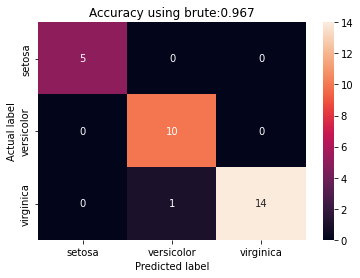

In [29]:
clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

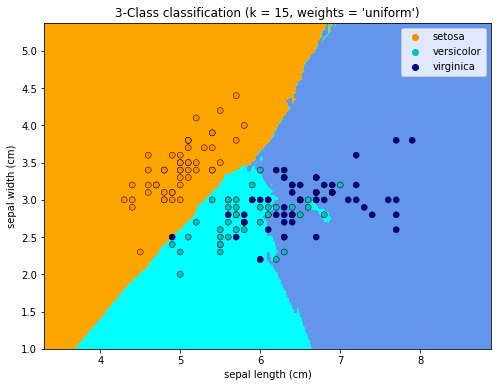

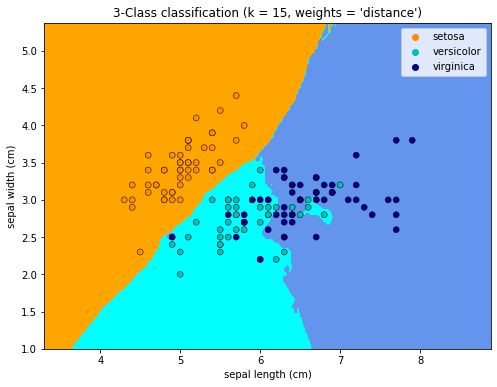

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()